In [74]:
import numpy as np
import matplotlib.pyplot as plt
from stiffness_matrix import stiffness_matrix
from load_vector import load_vector

### Utilities

In [93]:
def loglog_error(f, u, A, M=30):
    H = 1/np.logspace(1,2,50)
    print(H)
    e = np.zeros_like(H)
    for i, h in enumerate(H):
        X = np.arange(0,1,h)
        F = load_vector(f, X, len(X))
        F[0], F[-1] = 0, 0
        A = stiffness_matrix(alpha=1, b=1, c=2, H=np.ones(len(X))*h, M=len(X))
        u_num = np.linalg.solve(A, F)
        e[i] = np.max(np.abs(u(X) - u_num))
    return e, H


def loglogplot_error(h, e, ax=None):

    if ax is None:
        _, ax = plt.subplots()

    p = np.polyfit(np.log(h), np.log(e), 1)[0]

    ax.set_title("Error")
    ax.loglog(h, e, label=f"p={p:.3f}")
    ax.set_xlabel("h")
    ax.set_ylabel("e")
    ax.invert_xaxis()
    plt.legend()
    return plt

# Example using a solution with constant rhs

Let $c_1=-\frac{e^2 + e}{e^2 + e + 1}$, $c_1=-\frac{1}{e^2 + e + 1}$, and
$$
u(x)=c_1e^{x} + c_2 e^{-2x} + 1
$$
Then, using $\alpha=1$, $b=1$ and $c=2$, we have
$$
f(x)=-(Lu)(x) = 1
$$
This results in the elemental load vector
$$
\vec{F}^{K_i} = h_i (1, 1)^T
$$

In [76]:
M = 30
X = np.sort(np.random.random(M))
X[[0, -1]] = [0, 1]
H = np.diff(X)

F = np.zeros_like(X)
F[1:-2] += H[:-2]
F[2:-1] += H[2:]

A = stiffness_matrix(alpha=1, b=1, c=2, H=H, M=M)

In [77]:
U = np.linalg.solve(A, F)

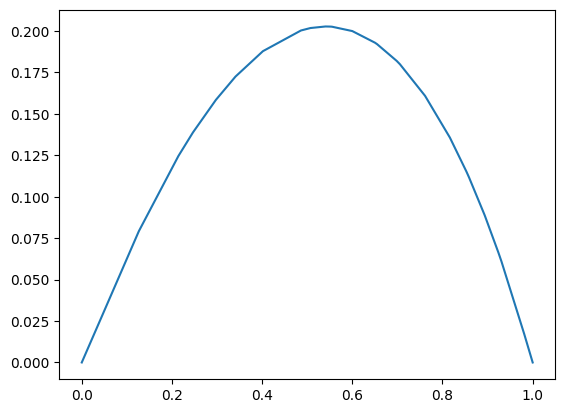

In [78]:
plt.plot(X, U)

In [79]:
def u(x):
    return (-np.exp(2*x)) / (np.exp(1) + np.exp(2) + 1) + np.exp(-x) * (-np.exp(1)- np.exp(2)) / (np.exp(1) + np.exp(2) + 1) + 1

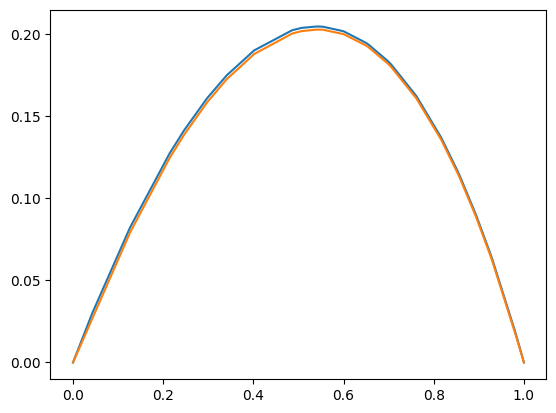

In [80]:
plt.plot(X, u(X))
plt.plot(X, U)

## 2b

We have two possible test solutions 
$$u_1(x) = x(1-x)$$
and
$$u_2(x) = sin(3 \pi x)$$
This gives the right hand sides 
$$f_1(x) = cx^2 + (c-2b)x + (b-2\alpha)$$
and 
$$f_2(x) = (9\pi^2\alpha+c)sin(3\pi x) + 3\pi b cos(3\pi x)$$
respectively. 

we implement the r.h.s:

In [81]:
def u2b_1(x):
    return x*(1-x)

def f2b_1(x, alpha=1, b=1, c=2):
    return -c*x**2 + (c-2*b)*x + (b+2*alpha)

def u2b_2(x):
    return np.sin(3*np.pi*x)

def f2b_2(x, alpha=1, b=1, c=2):
    return (9*np.pi**2 * alpha + c)*np.sin(3*np.pi*x) + 3*np.pi*b*np.cos(3*np.pi*x)

We then find the load vector and test the method:

[0.1        0.09540955 0.09102982 0.08685114 0.08286428 0.07906043
 0.0754312  0.07196857 0.06866488 0.06551286 0.06250552 0.05963623
 0.05689866 0.05428675 0.05179475 0.04941713 0.04714866 0.04498433
 0.04291934 0.04094915 0.0390694  0.03727594 0.0355648  0.03393222
 0.03237458 0.03088844 0.02947052 0.02811769 0.02682696 0.02559548
 0.02442053 0.02329952 0.02222996 0.02120951 0.0202359  0.01930698
 0.0184207  0.01757511 0.01676833 0.01599859 0.01526418 0.01456348
 0.01389495 0.01325711 0.01264855 0.01206793 0.01151395 0.01098541
 0.01048113 0.01      ]
[0.1        0.09540955 0.09102982 0.08685114 0.08286428 0.07906043
 0.0754312  0.07196857 0.06866488 0.06551286 0.06250552 0.05963623
 0.05689866 0.05428675 0.05179475 0.04941713 0.04714866 0.04498433
 0.04291934 0.04094915 0.0390694  0.03727594 0.0355648  0.03393222
 0.03237458 0.03088844 0.02947052 0.02811769 0.02682696 0.02559548
 0.02442053 0.02329952 0.02222996 0.02120951 0.0202359  0.01930698
 0.0184207  0.01757511 0.01676833 0.01

Text(0, 0.5, 'error')

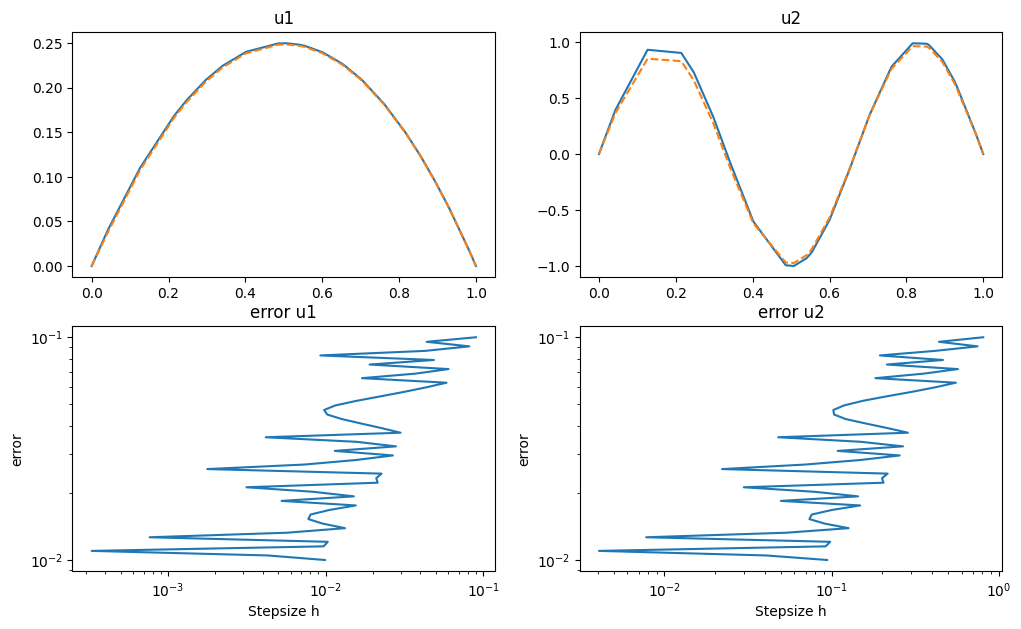

In [94]:
# here we construct the load-vector
F_2b1 = load_vector(f2b_1, X, M)
F_2b2 = load_vector(f2b_2, X, M)

# here we set boundary equal to zero
F_2b1[0], F_2b1[-1], F_2b2[0], F_2b2[-1] = 0, 0, 0, 0

# here we calculate the numerical solution
U_2b1 = np.linalg.solve(A, F_2b1)
U_2b2 = np.linalg.solve(A, F_2b2)

# now we also find the error
e1, H1 = loglog_error(f2b_1, u2b_1, A)
e2, H2 = loglog_error(f2b_2, u2b_2, A)

p1 = np.polyfit(np.log(H1), np.log(e1), 1)[0]
p2 = np.polyfit(np.log(H2), np.log(e2), 1)[0]

# Here we plit the figures
plt.figure(figsize=(12,7))

plt.subplot(2,2,1, title="u1")
plt.plot(X, u2b_1(X))
plt.plot(X, U_2b1, linestyle='dashed')

plt.subplot(2,2,2,title="u2")
plt.plot(X, u2b_2(X))
plt.plot(X, U_2b2, linestyle='dashed')

plt.subplot(2,2,3, title='error u1')
plt.loglog(e1, H1, label=f"p={p1:.3f}")
plt.xlabel('Stepsize h')
plt.ylabel('error')

plt.subplot(2,2,4, title='error u2')
plt.loglog(e2, H2, label=f"p={p2:.3f}")
plt.xlabel('Stepsize h')
plt.ylabel('error')